In [26]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Supress Scientific notation in python
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
import time
import datetime as dt
warnings.filterwarnings("ignore")


# Data Cleaning:



In [27]:
train = pd.read_excel('//Users/jerrylaivivemachi/Dt Bootcamp/Dt BootCampCourse/Capstone Prod1./Data-Science-Capstone-Projects-master/(Retail-PGP DT)Project 3 datasets-1/train.xlsx', parse_dates=['InvoiceDate'])
train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,NaN,United Kingdom
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.00,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.00,United Kingdom
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.00,United Kingdom
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.00,United Kingdom


In [28]:
train.shape

(379336, 8)

In [29]:
train.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
379331    False
379332    False
379333    False
379334    False
379335    False
Length: 379336, dtype: bool

In [30]:
train.duplicated().sum()

2673

In [31]:
print(f'Duplicate items in train dataset is {train.duplicated().sum()}')

Duplicate items in train dataset is 2673


In [32]:
# Remove duplicate items
train = train[~train.duplicated()]

In [33]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
# Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
# Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
# Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})
# Sort the table by percentage of missing descending    
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values('% of Total Values', ascending=False).round(1)
# Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n" +
      "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
# Return the dataframe with missing information
    return mis_val_table_ren_columns




In [34]:
missing_values_table(train)

Your selected dataframe has 8 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
CustomerID,94243,25.00
Description,963,0.30


In [35]:
Invoice_list = train[train.CustomerID.isnull()]['InvoiceNo'].tolist()

In [36]:
len(train[train.InvoiceNo.isin(Invoice_list)])

94243

## Formulate an apt strategy to treat Missing Data

In [37]:
rfm_train = train[train.CustomerID.notnull()].copy()

In [38]:
rfm_train.CustomerID = (rfm_train.CustomerID).astype(int)

In [39]:
missing_values_table(rfm_train) # Train

Your selected dataframe has 8 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [40]:
desc_df = rfm_train[~rfm_train.InvoiceNo.str.contains('C', na=False)]

In [41]:
desc_df['Total_cost'] = rfm_train.Quantity * rfm_train.UnitPrice

In [42]:
# Check the oldest and latest date in the dataset.
print(f'Oldest date is - {desc_df.InvoiceDate.min()}\n')
print(f'Latest date is - {desc_df.InvoiceDate.max()}')

Oldest date is - 2010-12-01 08:26:00

Latest date is - 2011-12-09 12:50:00


In [44]:
desc_df.Country.value_counts(normalize=True).head(10).mul(100).round(1).astype(str) + '%'






Country
United Kingdom    89.0%
Germany            2.3%
France             2.1%
EIRE               1.8%
Spain              0.6%
Netherlands        0.6%
Belgium            0.5%
Switzerland        0.5%
Portugal           0.4%
Australia          0.3%
Name: proportion, dtype: object

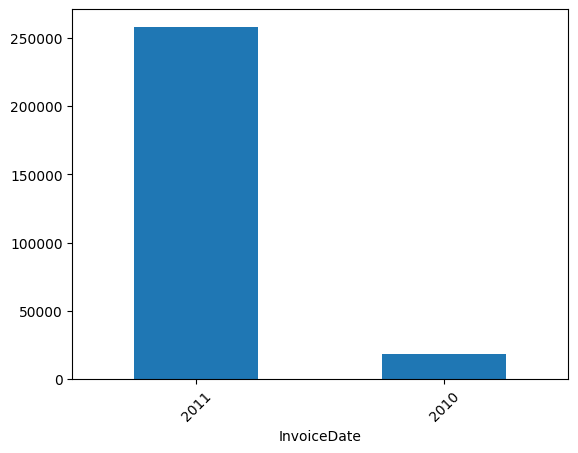

In [45]:
desc_df.InvoiceDate.dt.year.value_counts(sort=False).plot(kind='bar', rot=45);

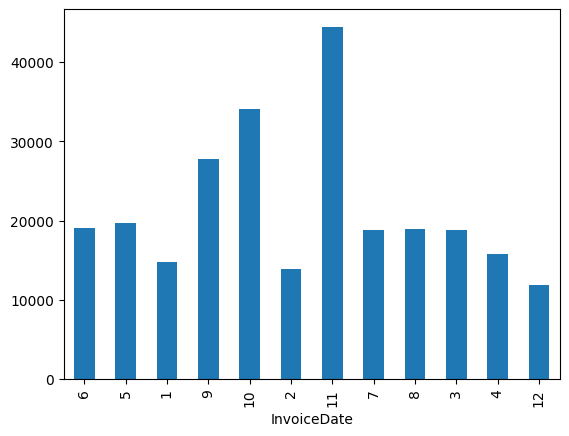

In [46]:
desc_df[desc_df.InvoiceDate.dt.year==2011].InvoiceDate.dt.month.value_counts(sort=False).plot(kind='bar');

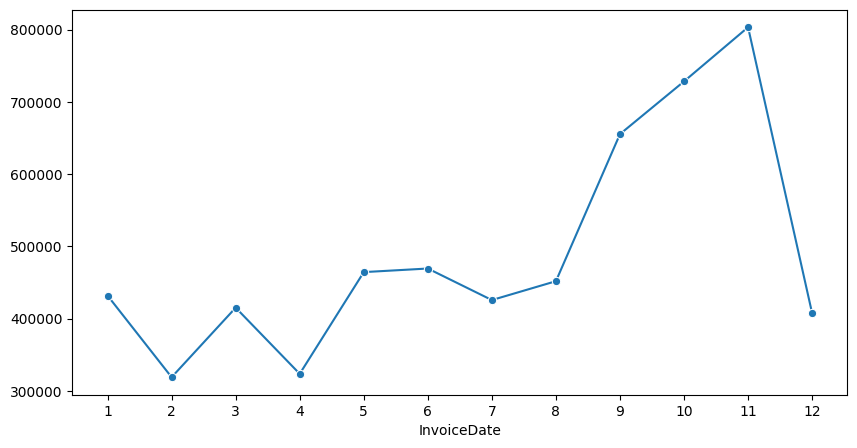

In [47]:
monthly_gross = desc_df[desc_df.InvoiceDate.dt.year==2011].groupby(desc_df.InvoiceDate.dt.month).Total_cost.sum()
plt.figure(figsize=(10,5))
sns.lineplot(y=monthly_gross.values,x=monthly_gross.index, marker='o');
plt.xticks(range(1,13))
plt.show();

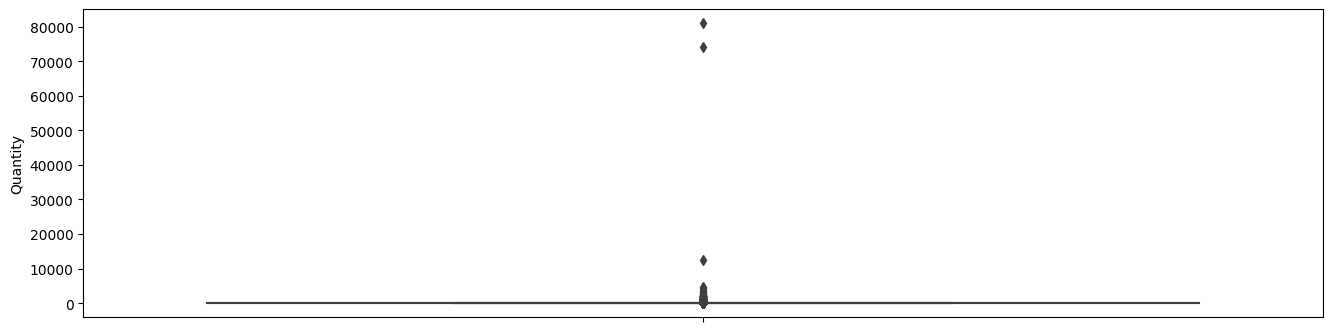

In [48]:
 plt.figure(figsize=(16,4))
sns.boxplot(y='Quantity', data=desc_df, orient='h');

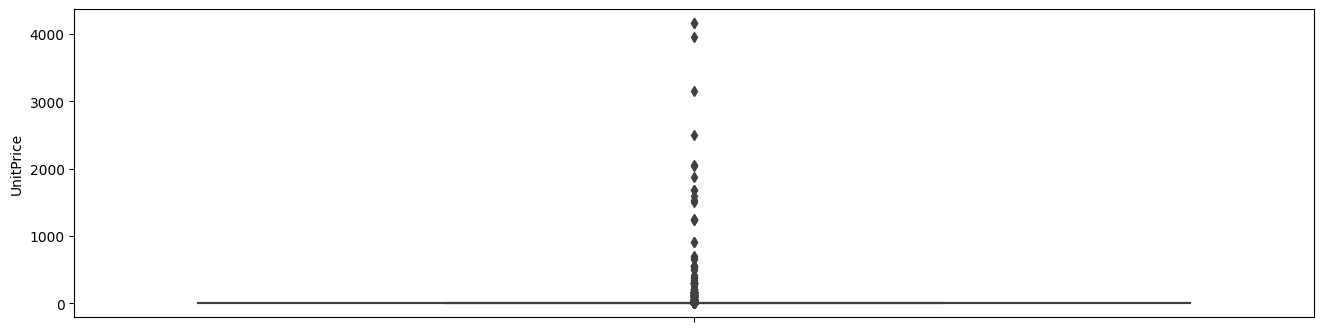

In [49]:
plt.figure(figsize=(16,4))
sns.boxplot(y='UnitPrice', data=desc_df, orient='h');

In [50]:
desc_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_cost
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126,United Kingdom,30.00
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118,United Kingdom,5.10
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529,United Kingdom,0.85
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448,United Kingdom,19.50
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911,United Kingdom,15.00


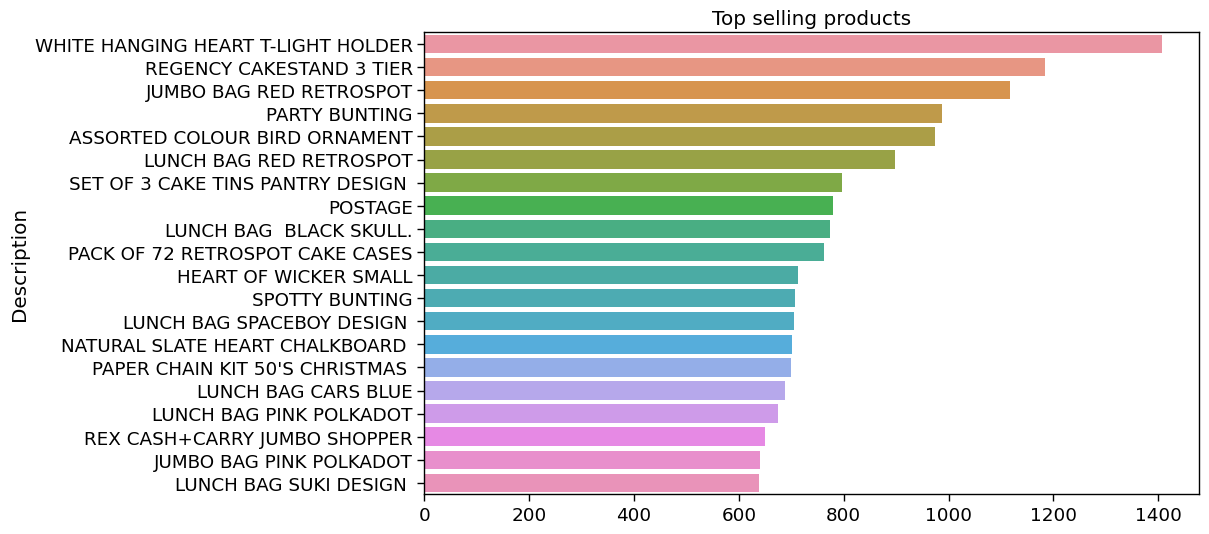

In [51]:
# Let's visualize some top products from the whole range.
top_products = desc_df['Description'].value_counts()[:20]
plt.figure(figsize=(10,6))
sns.set_context("paper", font_scale=1.5)
sns.barplot(y = top_products.index,
x = top_products.values)
plt.title("Top selling products")
plt.show();

In [52]:

from IPython.display import display, HTML

# Replace the HTML code below with the actual code you provided
tableau_html_code = """
<div class='tableauPlaceholder' id='viz1574249006038' style='position: relative'>
    <noscript>
        <a href='#'>
            <img alt=' ' src='https://public.tableau.com/static/images/Mu/Multinationonlineretailstore/OnlineStoreDashboard/1_rss.png' style='border: none' />
        </a>
    </noscript>
    <object class='tableauViz' style='display:none;'>
        <param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' />
        <param name='embed_code_version' value='3' />
        <param name='site_root' value='' />
        <param name='name' value='Multinationonlineretailstore/OnlineStoreDashboard' />
        <param name='tabs' value='no' />
        <param name='toolbar' value='yes' />
        <param name='static_image' value='https://public.tableau.com/static/images/Mu/Multinationonlineretailstore/OnlineStoreDashboard/1.png' />
        <param name='animate_transition' value='yes' />
        <param name='display_static_image' value='yes' />
        <param name='display_spinner' value='yes' />
        <param name='display_overlay' value='yes' />
        <param name='display_count' value='yes' />
    </object>
</div>
<script type='text/javascript'>
    var divElement = document.getElementById('viz1574249006038'); // Replace the ID with the correct one
    var vizElement = divElement.getElementsByTagName('object')[0];
    vizElement.style.width = '800px'; // Set your desired width
    vizElement.style.height = '600px'; // Set your desired height
</script>
"""

# Display the Tableau visualization
display(HTML(tableau_html_code))




## Data Transformation:

Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts

In [53]:
cohort = rfm_train.copy()

In [54]:
def get_month(x):
    return dt.datetime(x.year,x.month,1)

# Create InvoiceMonth column
cohort['InvoiceMonth'] = cohort['InvoiceDate'].apply(get_month)

# Group by CustomerID and select the InvoiceMonth value
grouping = cohort.groupby('CustomerID')['InvoiceMonth']

# Assign a minimum InvoiceMonth value to the dataset
cohort['CohortMonth'] = grouping.transform('min')

In [55]:
 def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

In [56]:
invoice_year, invoice_month = get_date_int(cohort,'InvoiceMonth')
# Get the integers for date parts from the `CohortMonth` column
cohort_year, cohort_month = get_date_int(cohort,'CohortMonth')

In [57]:
years_diff = invoice_year - cohort_year
# Calculate difference in months
months_diff = invoice_month - cohort_month
# Extract the difference in months from all previous values
cohort['CohortIndex'] = years_diff * 12 + months_diff + 1

In [58]:
 cohort.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126,United Kingdom,2011-06-01,2011-02-01,5
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118,United Kingdom,2011-05-01,2010-12-01,6
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529,United Kingdom,2011-01-01,2010-12-01,2
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448,United Kingdom,2010-12-01,2010-12-01,1
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911,United Kingdom,2011-05-01,2011-02-01,4


In [59]:
grouping = cohort.groupby(['CohortMonth', 'CohortIndex'])

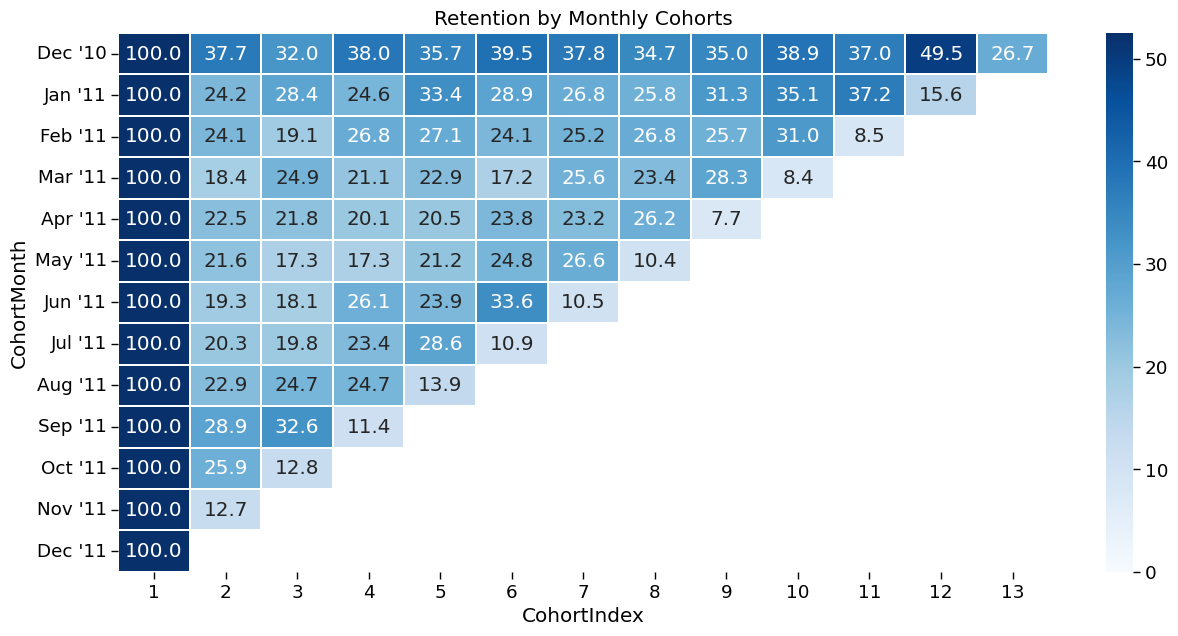

In [60]:
# Count the number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Create a pivot
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:, 0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0) * 100

month_list = ["Dec '10", "Jan '11", "Feb '11", "Mar '11", "Apr '11", "May '11", "Jun '11", "Jul '11", "Aug '11", "Sep '11", "Oct '11", "Nov '11", "Dec '11"]

# Initialize inches plot figure
plt.figure(figsize=(15, 7))

# Add a title
plt.title('Retention by Monthly Cohorts')

# Create the heatmap
sns.heatmap(data=retention,
            annot=True,
            cmap="Blues",
            vmin=0.0,
            vmax=list(retention.max().sort_values(ascending=False))[1] + 3,
            fmt='.1f',
            linewidth=0.3,
            yticklabels=month_list)

plt.show()

### Conclusion 

The graph shows the retention rate of different monthly cohorts of customers over a period of six months. A cohort is a group of customers who joined in the same month. Retention rate is the percentage of customers who stayed with the service after a certain number of months.
The x-axis of the graph is the cohort date, which is the month when the cohort joined. The y-axis is the retention percentage, which is the proportion of customers who remained active in the sixth month.
The data in the table below the graph shows the retention rate for each cohort in each month. For example, the first row shows that the Dec 2020 cohort had a 100% retention rate in Dec 2020, a 90% retention rate in Jan 2021, and so on until a 60% retention rate in May 2021.
Some observations from the graph and table are:
The Dec 2020 cohort has the highest retention rate among all cohorts, with 60% retention in May 2021. This means that 60% of customers who joined in Dec 2020 were still active in May 2021.
The May 2021 cohort has the lowest retention rate among all cohorts, with only 10% retention in May 2021. This means that only 10% of customers who joined in May 2021 stayed with the service for at least one month.
The general trend is that retention rate decreases as cohort date increases, which means that customers who joined later tend to drop off faster. However, there are some exceptions where retention rate increases or stays constant for some cohorts at certain points. For example, the Jan 2021 cohort has a slight increase in retention rate from Feb 2021 to Mar 2021, and the Apr 2021 cohort has a constant retention rate from Apr 2021 to May 2021.
There is also some seasonality in the data, which means that retention rate varies depending on the month of joining. For example, cohorts that joined in winter months (Dec, Jan, Feb) tend to have higher retention rates than cohorts that joined in spring months (Mar, Apr, May). This could be due to factors such as weather, holidays, or customer preferences.


In [61]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = cohort.groupby(['CohortMonth', 'CohortIndex'])

# Calculate the average of the unit price column
cohort_data = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')
average_price = average_price.round(1)
average_price.index = average_price.index.date

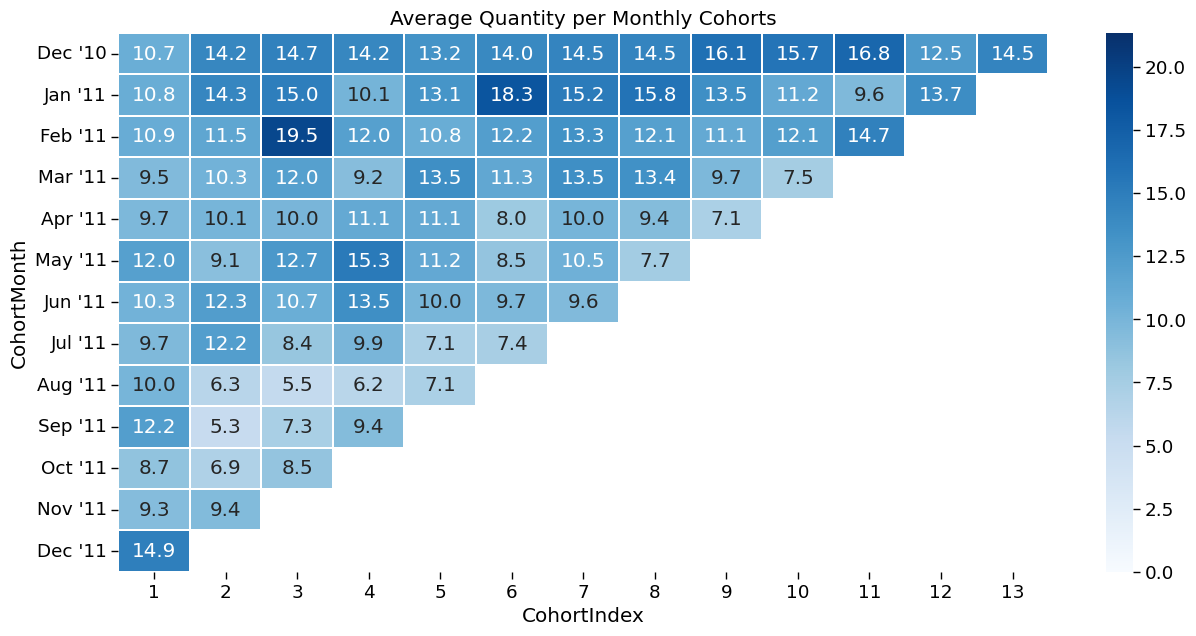

In [62]:
# Step 1: Data Grouping
grouping = cohort.groupby(['CohortMonth', 'CohortIndex'])

# Step 2: Calculate Average Quantity
cohort_data = grouping['Quantity'].mean()

# Step 3: Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Step 4: Create a pivot table
average_quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity')

# Step 5: Set up the heatmap properties
plt.figure(figsize=(15, 7))
plt.title('Average Quantity per Monthly Cohorts')
sns.heatmap(data=average_quantity,
            annot=True,
            vmin=0.0,
            cmap='Blues',
            vmax=list(average_quantity.max().sort_values(ascending=False))[1] + 3,
            fmt='.1f',
            linewidth=0.3,
            yticklabels=month_list)

# Step 6: Display the heatmap
plt.show()

In [63]:
 rfm_train['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [8]:
current_date = dt.date(2011,12,9)

In [64]:
rfm_train['Purchase_Date'] = rfm_train.InvoiceDate.dt.date

In [65]:
recency = rfm_train.groupby('CustomerID')['Purchase_Date'].max().reset_index()

In [66]:
recency = recency.assign(Current_Date = current_date)

In [67]:
recency['Recency'] = recency.Purchase_Date.apply(lambda x: (current_date - x).days)

In [68]:
recency.head()

,CustomerID,Purchase_Date,Current_Date,Recency
0,12346,2011-01-18,2011-12-09,325
1,12347,2011-12-07,2011-12-09,2
2,12348,2011-09-25,2011-12-09,75
3,12349,2011-11-21,2011-12-09,18
4,12350,2011-02-02,2011-12-09,310


In [69]:
recency.drop(['Purchase_Date','Current_Date'], axis=1, inplace=True)

In [70]:
frequency = rfm_train.groupby('CustomerID').InvoiceNo.nunique().reset_index().rename(columns={'InvoiceNo':'Frequency'})

In [71]:
frequency.head()

,CustomerID,Frequency
0,12346,2
1,12347,7
2,12348,4
3,12349,1
4,12350,1


In [72]:
rfm_train['Total_cost'] = rfm_train.Quantity * rfm_train.UnitPrice

In [73]:
monetary = rfm_train.groupby('CustomerID').Total_cost.sum().reset_index().rename(columns={'Total_cost':'Monetary'})

In [74]:
monetary.head()

,CustomerID,Monetary
0,12346,0.00
1,12347,3124.96
2,12348,1009.88
3,12349,1344.17
4,12350,213.30


In [75]:
temp_ = recency.merge(frequency, on='CustomerID')
rfm_table = temp_.merge(monetary, on='CustomerID')

In [76]:
rfm_table.set_index('CustomerID',inplace=True)
rfm_table.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,2,0.00
12347,2,7,3124.96
12348,75,4,1009.88
12349,18,1,1344.17
12350,310,1,213.30


In [77]:
rfm_train[rfm_train.CustomerID == rfm_table.index[0]]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Purchase_Date,Total_cost
195933,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,2011-01-18,-77183.60
322892,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,2011-01-18,77183.60


In [81]:
(current_date - rfm_train[rfm_train.CustomerID == rfm_table.index[0]].iloc[0].Purchase_Date).days == rfm_table.iloc[0,0]

True

In [82]:
# RFM Quantiles
quantiles = rfm_table.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,17.00,1.00,200.77
0.50,50.00,2.00,457.10
0.75,144.00,5.00,1136.80


In [83]:
quantiles=quantiles.to_dict()
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 144.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 200.76999999999998, 0.5: 457.1, 0.75: 1136.8}}

In [84]:
def RScore(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [85]:
def FMScore(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4


In [86]:
rfm_segment = rfm_table.copy()

rfm_segment['R_Quartile'] = rfm_segment['Recency'].apply(RScore, args=('Recency', quantiles))
rfm_segment['F_Quartile'] = rfm_segment['Frequency'].apply(FMScore, args=('Frequency', quantiles))
rfm_segment['M_Quartile'] = rfm_segment['Monetary'].apply(FMScore, args=('Monetary', quantiles))


In [87]:
rfm_segment.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12346,325,2,0.00,1,2,1
12347,2,7,3124.96,4,4,4
12348,75,4,1009.88,2,3,3
12349,18,1,1344.17,3,1,4
12350,310,1,213.30,1,1,2


In [88]:
rfm_segment['RFMScore'] = rfm_segment.R_Quartile.map(str) \
+ rfm_segment.F_Quartile.map(str) \
+ rfm_segment.M_Quartile.map(str)
rfm_segment.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
12346,325,2,0.00,1,2,1,121
12347,2,7,3124.96,4,4,4,444
12348,75,4,1009.88,2,3,3,233
12349,18,1,1344.17,3,1,4,314
12350,310,1,213.30,1,1,2,112


In [89]:
# Reset the index to create a customer_ID column
rfm_segment.reset_index(inplace=True)

In [91]:
segment_dict = {
    'Best Customers': '444',        # Highest frequency and monetary value with least recency
    'Loyal Customers': '344',       # High frequency and monetary value with good recency
    'Big Spenders': '334',          # High monetary value with good recency and frequency values
    'Almost Lost': '244',           # Customers shopping less often now who used to shop a lot
    'Lost Customers': '144',        # Customers shopped long ago who used to shop a lot
    'Recent Customers': '443',      # Customers who recently started shopping a lot but with less monetary value
    'Lost Cheap Customers': '122'   # Customers shopped long ago but with less frequency and monetary value
}


In [92]:
dict_segment = dict(zip(segment_dict.values(),segment_dict.keys()))

In [93]:
rfm_segment['Segment'] = rfm_segment.RFMScore.map(lambda x: dict_segment.get(x))

In [94]:
rfm_segment.Segment.fillna('others', inplace=True)

In [95]:
rfm_segment.sample(10)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
4162,18024,152,2,37.37,1,2,1,121,others
164,12551,357,1,97.00,1,1,1,111,others
195,12588,39,1,154.65,3,1,1,311,others
1332,14149,212,2,251.63,1,2,2,122,Lost Cheap Customers
1485,14362,22,1,125.55,3,1,1,311,others
2599,15867,5,15,2661.60,4,4,4,444,Best Customers
2129,15241,66,9,1230.37,2,4,4,244,Almost Lost
2306,15483,161,4,162.88,1,3,1,131,others
1093,13823,18,2,560.12,3,2,3,323,others
910,13566,40,2,547.13,3,2,3,323,others


In [103]:
 %%html
 <div class='tableauPlaceholder' id='viz1574249157493' style='position: relative'>
    <noscript>
        <a href='#'>
            <img alt=' ' src='https://public.tableau.com/static/images/RF/RFM_Analysis_15741611609370/RFMAnalysis/1_rss.png' style='border: none' />
        </a>
    </noscript>
    <object class='tableauViz' style='display:none;'>
        <param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' />
        <param name='embed_code_version' value='3' />
        <param name='site_root' value='' />
        <param name='name' value='RFM_Analysis_15741611609370/RFMAnalysis' />
        <param name='tabs' value='no' />
        <param name='toolbar' value='yes' />
        <param name='static_image' value='https://public.tableau.com/static/images/RF/RFM_Analysis_15741611609370/RFMAnalysis/1.png' />
        <param name='animate_transition' value='yes' />
        <param name='display_static_image' value='yes' />
        <param name='display_spinner' value='yes' />
        <param name='display_overlay' value='yes' />
        <param name='display_count' value='yes' />
    </object>
</div>
<script type='text/javascript'>
    var divElement = document.getElementById('viz1574249157493');
</script>

In [104]:
rfm_segment[rfm_segment.RFMScore=='444'].sort_values('Monetary',ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
1693,14646,1,73,190309.32,4,4,4,444,Best Customers
4215,18102,1,57,168303.40,4,4,4,444,Best Customers
3743,17450,8,49,115080.82,4,4,4,444,Best Customers
1885,14911,1,239,95881.81,4,4,4,444,Best Customers
1337,14156,9,63,76938.26,4,4,4,444,Best Customers


In [106]:
rfm_segment[rfm_segment.RFMScore=='334'].sort_values('Monetary',ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
2780,16126,29,4,4279.60,3,3,4,334,Big Spenders
79,12444,21,5,4064.51,3,3,4,334,Big Spenders
731,13316,37,5,3828.67,3,3,4,334,Big Spenders
2883,16258,45,5,3761.40,3,3,4,334,Big Spenders
2909,16303,25,4,3625.31,3,3,4,334,Big Spenders


In [107]:
rfm_segment[rfm_segment.RFMScore=='244'].sort_values('Monetary',ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
462,12939,64,8,8402.52,2,4,4,244,Almost Lost
2822,16180,100,10,7878.22,2,4,4,244,Almost Lost
50,12409,78,6,7550.55,2,4,4,244,Almost Lost
3233,16745,86,18,5261.59,2,4,4,244,Almost Lost
3163,16652,53,9,5121.30,2,4,4,244,Almost Lost


In [108]:
rfm_segment[rfm_segment.RFMScore=='122'].sort_values('Monetary',ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
2765,16109,218,2,447.36,1,2,2,122,Lost Cheap Customers
1492,14377,191,2,443.25,1,2,2,122,Lost Cheap Customers
4203,18085,330,2,442.60,1,2,2,122,Lost Cheap Customers
794,13405,204,2,418.79,1,2,2,122,Lost Cheap Customers
3104,16567,194,2,412.21,1,2,2,122,Lost Cheap Customers


In [109]:
rfm_segment[rfm_segment.RFMScore=='344'].sort_values('Monetary',ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
55,12415,24,19,80874.54,3,4,4,344,Loyal Customers
456,12931,21,17,26266.01,3,4,4,344,Loyal Customers
2708,16029,38,71,23617.96,3,4,4,344,Loyal Customers
1718,14680,25,23,19329.98,3,4,4,344,Loyal Customers
317,12731,23,14,12502.70,3,4,4,344,Loyal Customers


In [110]:
rfm_segment[rfm_segment.RFMScore=='244'].sort_values('Monetary',ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
462,12939,64,8,8402.52,2,4,4,244,Almost Lost
2822,16180,100,10,7878.22,2,4,4,244,Almost Lost
50,12409,78,6,7550.55,2,4,4,244,Almost Lost
3233,16745,86,18,5261.59,2,4,4,244,Almost Lost
3163,16652,53,9,5121.30,2,4,4,244,Almost Lost


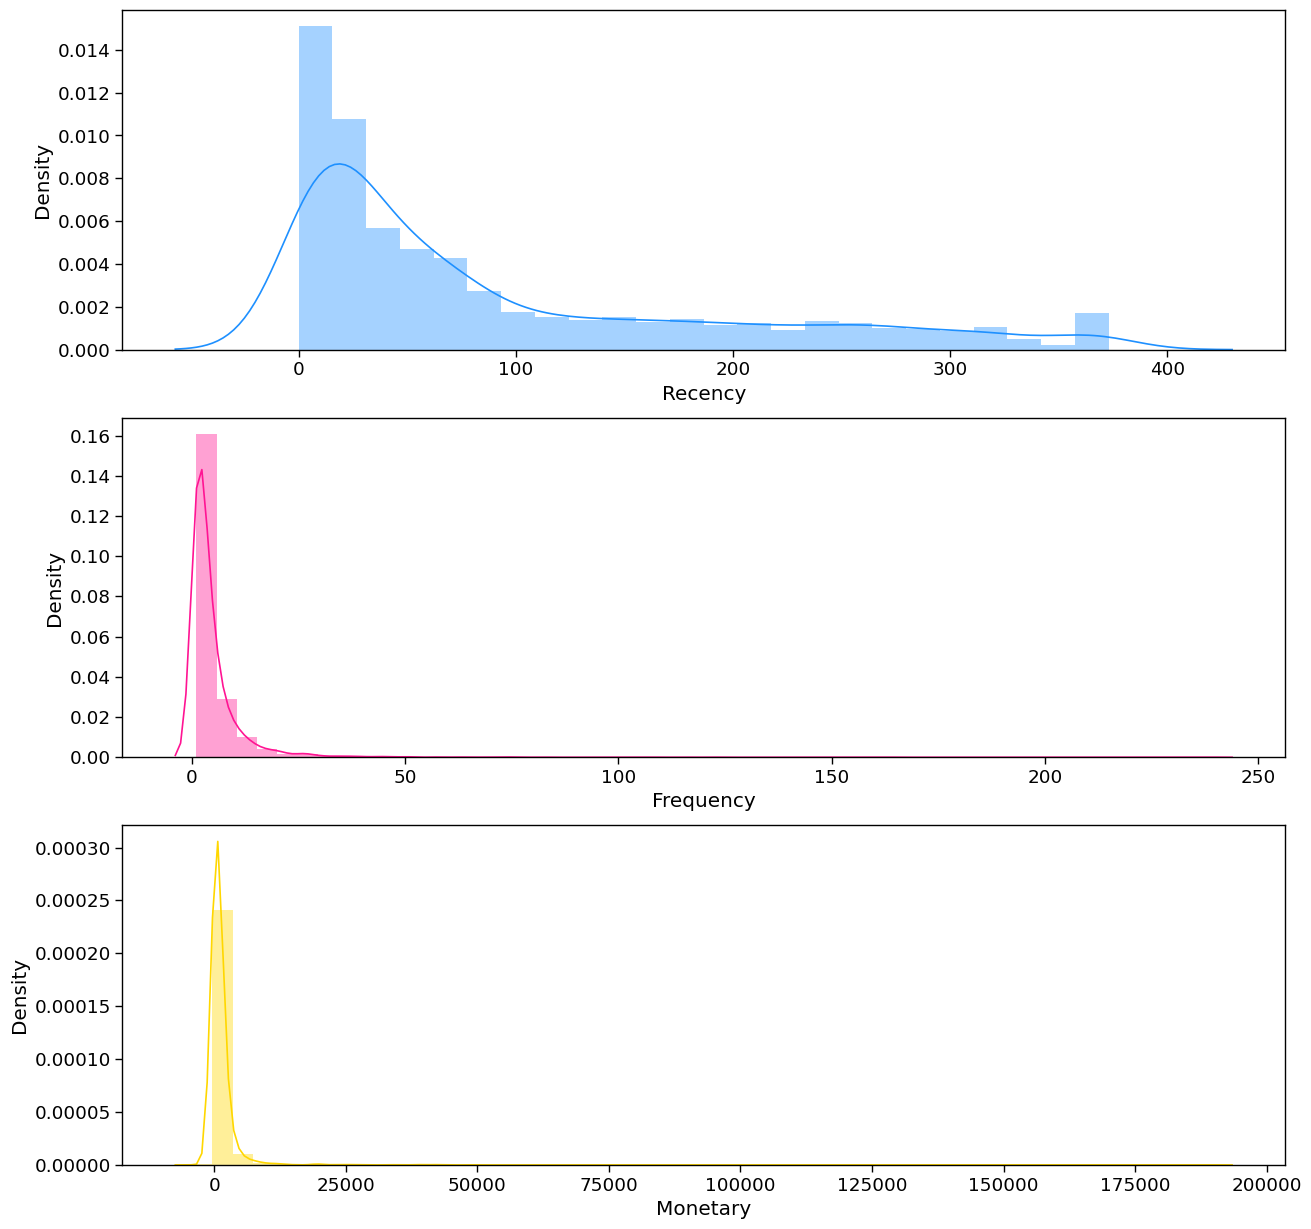

In [111]:
# plot
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(rfm_table.Recency , color="dodgerblue", ax=axes[0],axlabel='Recency')
sns.distplot(rfm_table.Frequency , color="deeppink", ax=axes[1],axlabel='Frequency')
sns.distplot(rfm_table.Monetary , color="gold", ax=axes[2], axlabel='Monetary')
# plt.xlim(50,75);
plt.show();

In [112]:
rfm_table.describe()

,Recency,Frequency,Monetary
count,4353.00,4353.00,4353.00
mean,92.20,4.82,1325.71
std,101.16,8.76,5550.92
min,0.00,1.00,-4287.63
25%,17.00,1.00,200.77
50%,50.00,2.00,457.10
75%,144.00,5.00,1136.80
max,373.00,239.00,190309.32


In [114]:
rfm_table_scaled = rfm_table.copy()
# Shift all values in the column by adding absolute of minimum value to each␣ , →value, thereby making each value positive.
rfm_table_scaled.Monetary = rfm_table_scaled.Monetary + abs(rfm_table_scaled.Monetary.min()) + 1
rfm_table_scaled.Recency = rfm_table_scaled.Recency + abs(rfm_table_scaled.Recency.min()) + 1
# Check the summary of new values
rfm_table_scaled.describe()

,Recency,Frequency,Monetary
count,4353.00,4353.00,4353.00
mean,93.20,4.82,5614.34
std,101.16,8.76,5550.92
min,1.00,1.00,1.00
25%,18.00,1.00,4489.40
50%,51.00,2.00,4745.73
75%,145.00,5.00,5425.43
max,374.00,239.00,194597.95


In [115]:
from sklearn.preprocessing import StandardScaler
# Taking log first because normalization forces data for negative values
log_df = np.log(rfm_table_scaled)
# Normalize the data for uniform averages and means in the distribution.
scaler = StandardScaler()
normal_df = scaler.fit_transform(log_df)
normal_df = pd.DataFrame(data=normal_df, index=rfm_table.index,columns=rfm_table.columns)

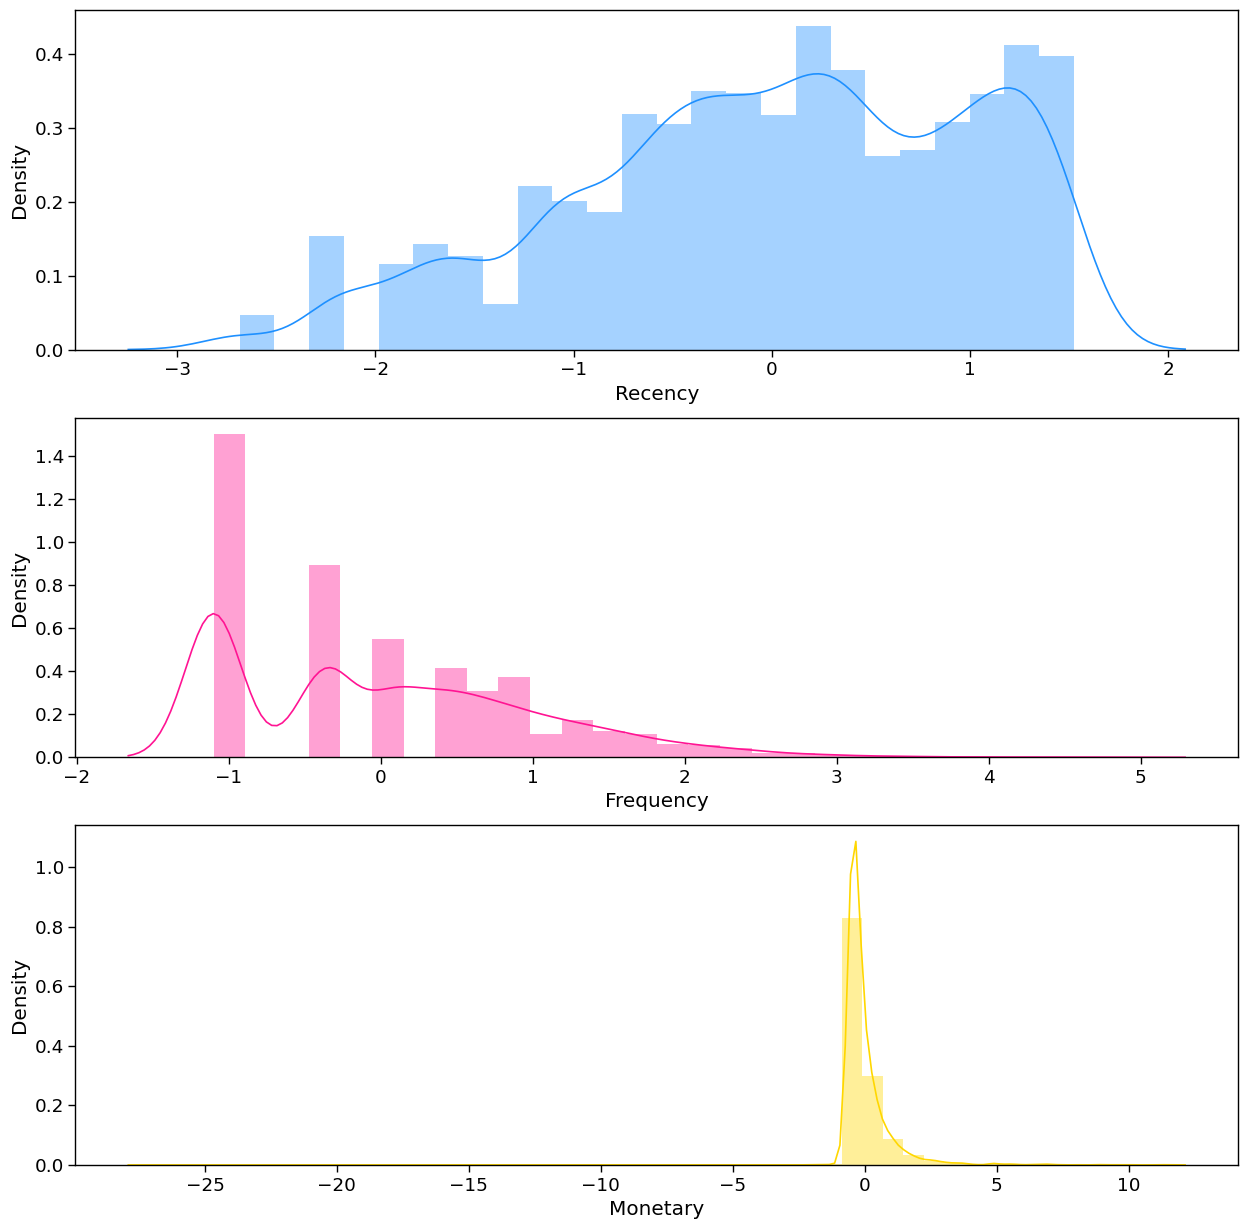

In [116]:
# plot again on the transformed RFM data
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(normal_df.Recency , color="dodgerblue", ax=axes[0],axlabel='Recency')
sns.distplot(normal_df.Frequency , color="deeppink", ax=axes[1],axlabel='Frequency')
sns.distplot(normal_df.Monetary , color="gold", ax=axes[2], axlabel='Monetary')
20
plt.show();

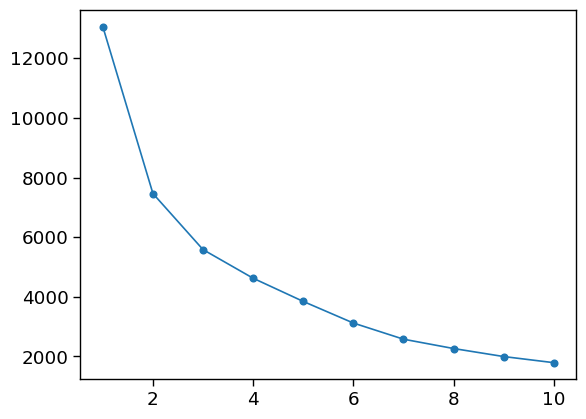

In [117]:
# find WCSS
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(normal_df)
    wcss.append(kmeans.inertia_)
    
# plot elbow graph
plt.plot(range(1,11),wcss,marker='o');


Silhouette score for number of cluster(s) 2: 0.4411007008657374
Silhouette score for number of cluster(s) 3: 0.40260763756284035
Silhouette score for number of cluster(s) 4: 0.3501957968952339
Silhouette score for number of cluster(s) 5: 0.36696955304121787
Silhouette score for number of cluster(s) 6: 0.35858260736317155
Silhouette score for number of cluster(s) 7: 0.36046280151358456
Silhouette score for number of cluster(s) 8: 0.35334900346448367
Silhouette score for number of cluster(s) 9: 0.355868586601738
Silhouette score for number of cluster(s) 10: 0.37047560343120456
Silhouette score for number of cluster(s) 11: 0.36959121471265527


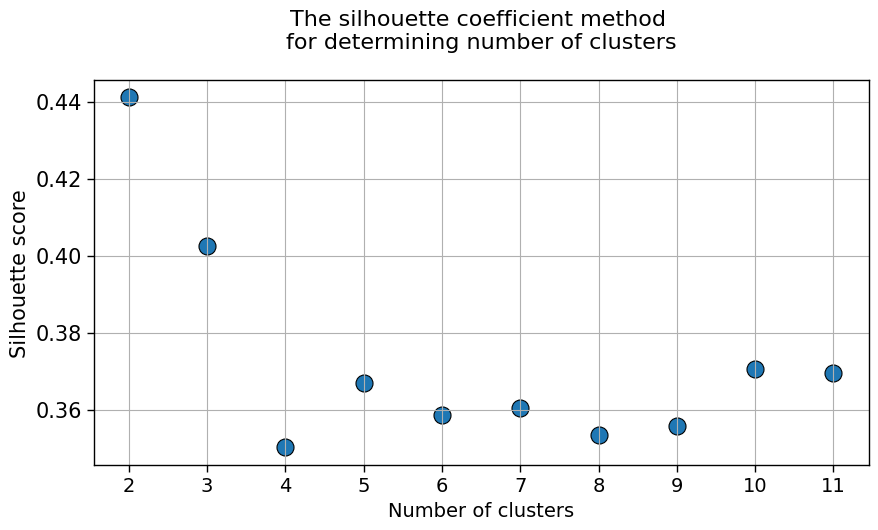

In [119]:
from sklearn.metrics import silhouette_score
wcss_silhouette = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0,init='k-means++').fit(normal_df)
    preds = km.predict(normal_df)
    silhouette = silhouette_score(normal_df,preds)
    wcss_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

plt.figure(figsize=(10,5))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=wcss_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [120]:
kmeans = KMeans(n_clusters=4, random_state=1, init='k-means++')
kmeans.fit(normal_df)
cluster_labels = kmeans.labels_

In [121]:
print(f"Shape of cluster label array is {cluster_labels.shape}")
print(f"Shape of RFM segment dataframe is {rfm_segment.shape}")

Shape of cluster label array is (4353,)
Shape of RFM segment dataframe is (4353, 9)


In [122]:
Cluster_table = rfm_segment.assign(Cluster = cluster_labels)

In [123]:
Cluster_table.Cluster.value_counts()

Cluster
0    1842
3    1604
1     830
2      77
Name: count, dtype: int64

In [124]:
Cluster_table.sample(10)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
2926,16326,5,14,2255.13,4,4,4,444,Best Customers,1
508,13005,173,3,426.80,1,3,2,132,others,0
2677,15988,19,1,105.00,3,1,1,311,others,3
3232,16744,11,7,974.37,4,4,3,443,Recent Customers,1
3354,16905,5,8,2114.23,4,4,4,444,Best Customers,1
652,13209,30,10,4133.70,3,4,4,344,Loyal Customers,1
892,13536,1,7,2479.75,4,4,4,444,Best Customers,1
4192,18072,155,2,17.64,1,2,1,121,others,0
455,12930,78,4,258.84,2,3,2,232,others,3
2550,15806,46,3,600.54,3,3,3,333,others,3


In [125]:
Cluster_table[Cluster_table.Cluster == 3].sample(5)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
2642,15938,112,5,364.38,2,3,2,232,others,3
1254,14045,109,4,1659.75,2,3,4,234,others,3
3090,16550,108,9,1645.84,2,4,4,244,Almost Lost,3
1111,13849,51,2,1039.01,2,2,3,223,others,3
551,13068,10,2,344.00,4,2,2,422,others,3


In [126]:
Cluster_table[Cluster_table.Cluster == 2].sample(5)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
2068,15159,1,33,13213.83,4,4,4,444,Best Customers,2
564,13089,4,108,39532.69,4,4,4,444,Best Customers,2
1260,14051,0,26,10503.12,4,4,4,444,Best Customers,2
2708,16029,38,71,23617.96,3,4,4,344,Loyal Customers,2
3200,16705,0,27,10091.49,4,4,4,444,Best Customers,2


In [127]:
Cluster_table[Cluster_table.Cluster == 1].sample(5)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
147,12528,9,8,1304.22,4,4,4,444,Best Customers,1
1764,14741,11,6,1037.74,4,4,3,443,Recent Customers,1
2900,16283,5,5,1028.19,4,3,3,433,others,1
2711,16033,5,27,6001.92,4,4,4,444,Best Customers,1
2510,15752,39,8,1809.81,3,4,4,344,Loyal Customers,1


In [128]:
Cluster_table[Cluster_table.Cluster == 0].sample(5)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
4073,17899,159,1,120.71,1,1,1,111,others,0
3406,16976,267,1,251.52,1,1,2,112,others,0
1420,14271,225,1,67.34,1,1,1,111,others,0
409,12864,138,1,136.92,2,1,1,211,others,0
3317,16849,186,1,89.37,1,1,1,111,others,0


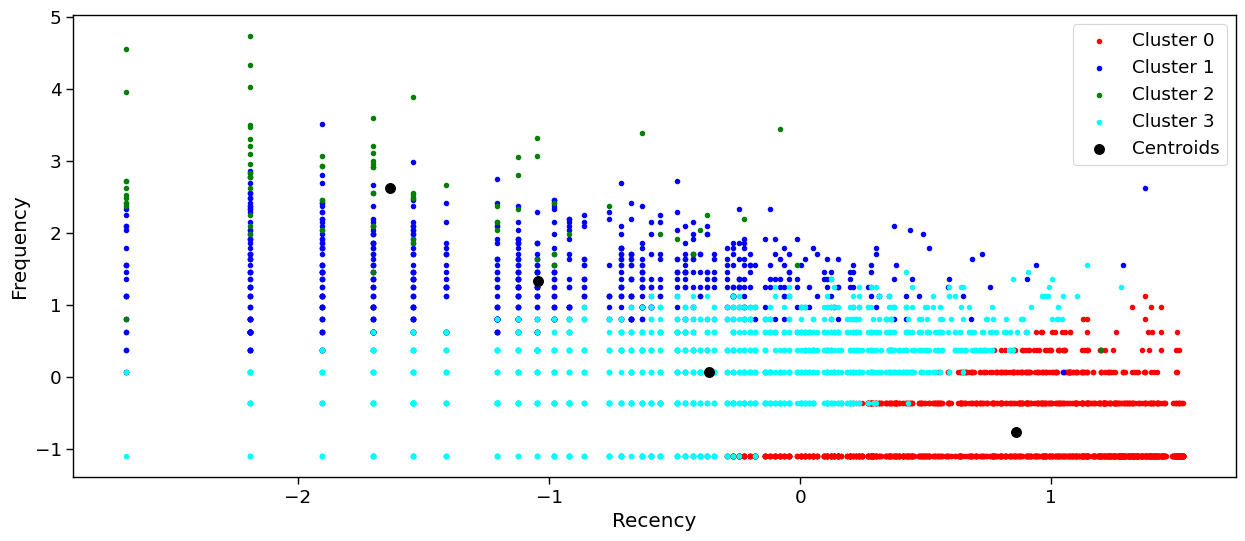

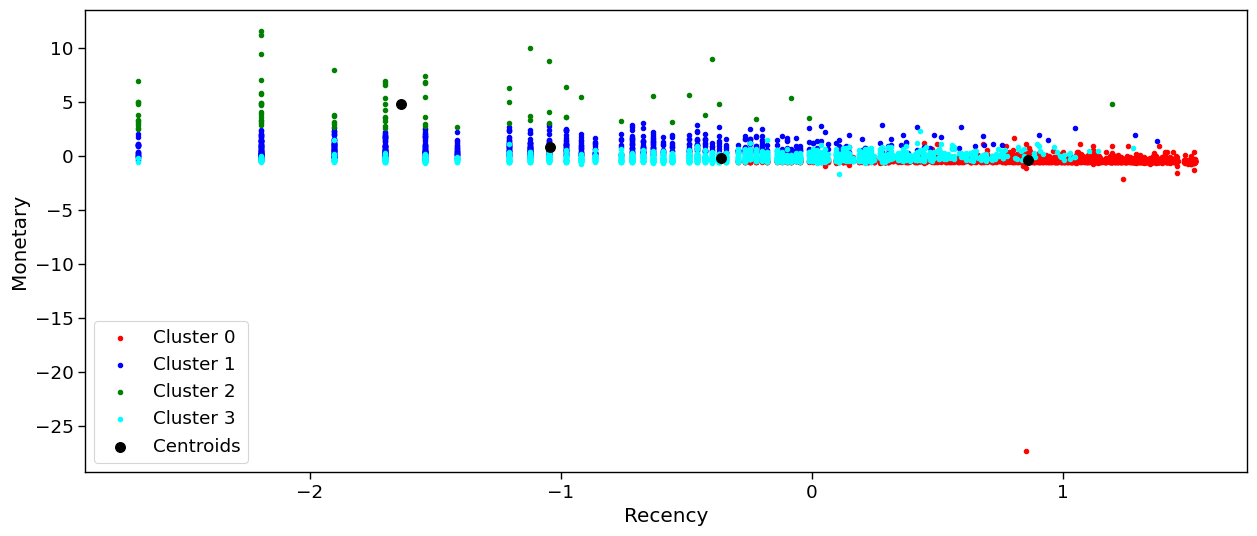

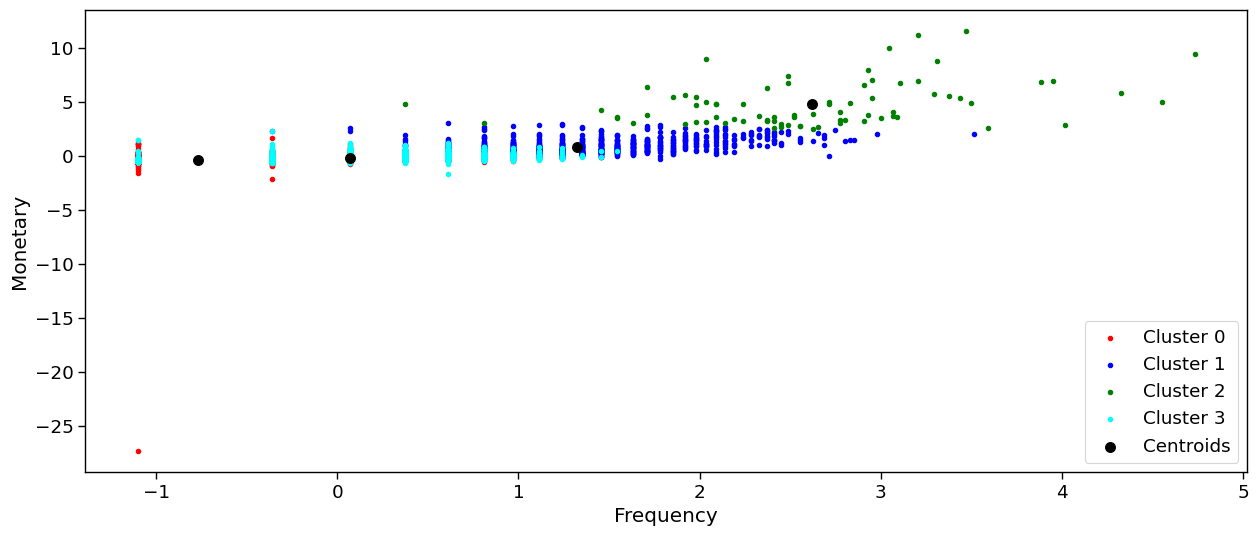

In [129]:
X = normal_df.iloc[:, 0:3].values
count = X.shape[1]

for i in range(0, count):
    for j in range(i + 1, count):
        plt.figure(figsize=(15, 6))
        
        plt.scatter(X[cluster_labels == 0, i], X[cluster_labels == 0, j], s=10, c='red', label='Cluster 0')
        plt.scatter(X[cluster_labels == 1, i], X[cluster_labels == 1, j], s=10, c='blue', label='Cluster 1')
        plt.scatter(X[cluster_labels == 2, i], X[cluster_labels == 2, j], s=10, c='green', label='Cluster 2')
        plt.scatter(X[cluster_labels == 3, i], X[cluster_labels == 3, j], s=10, c='cyan', label='Cluster 3')
        
        plt.scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:, j], s=50, c='black', label='Centroids')
        
        plt.xlabel(normal_df.columns[i])
        plt.ylabel(normal_df.columns[j])
        plt.legend()
        
        plt.show()


In [130]:
 normal_df = normal_df.assign(Cluster = cluster_labels)
# Melt normalized dataframe into long form to have all metric in same column
normal_melt = pd.melt(normal_df.reset_index(),
id_vars=['CustomerID','Cluster'],
value_vars=['Recency', 'Frequency', 'Monetary'],
var_name='Metric',
value_name='Value')
normal_melt.head()

,CustomerID,Cluster,Metric,Value
0,12346,0,Recency,1.43
1,12347,1,Recency,-1.90
2,12348,3,Recency,0.39
3,12349,3,Recency,-0.59
4,12350,0,Recency,1.39


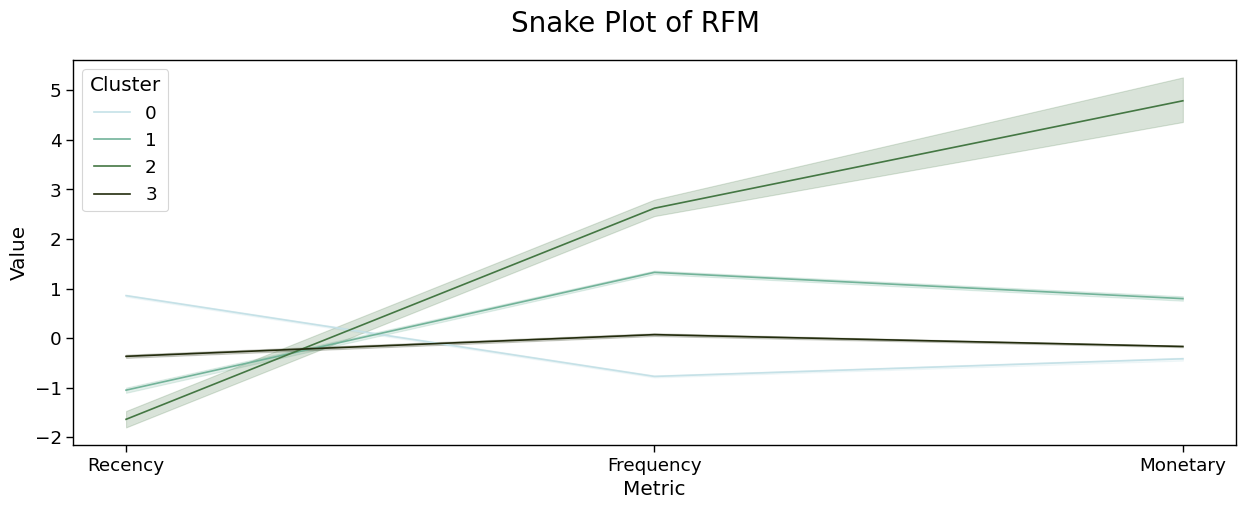

In [131]:
plt.figure(figsize=(15,5))
palette = sns.color_palette("mako_r", 4)
sns.lineplot(x = 'Metric', y = 'Value',
hue = 'Cluster',
data = normal_melt,
palette = "ch:4.4,.44")
plt.suptitle("Snake Plot of RFM",fontsize=20)
plt.show();

In [132]:
# Assign Cluster labels to RFM table
rfm_table_cluster = rfm_table.assign(Cluster = cluster_labels)
# Average attributes for each cluster
cluster_avg = rfm_table_cluster.groupby(['Cluster']).mean()
# Calculate the population average
population_avg = rfm_table.mean()
# Calculate relative importance of attributes by
relative_imp = cluster_avg / population_avg - 1

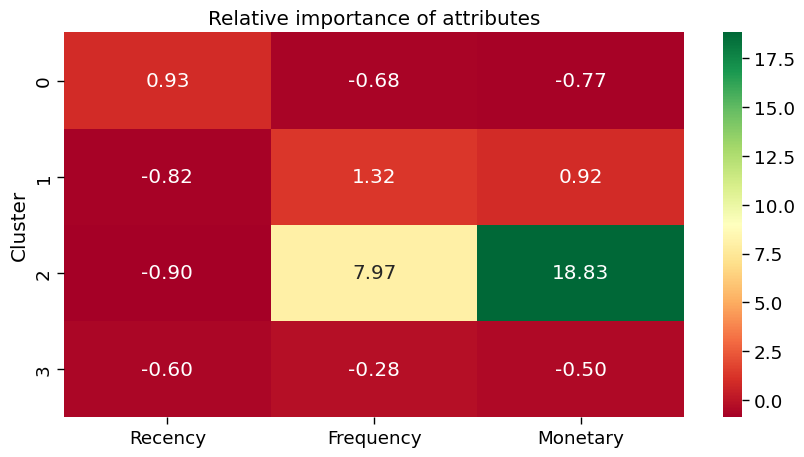

In [133]:
plt.figure(figsize=(10, 5))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show();